## HW1 - Basics of ML
Include your code in the relevant cells below.
Subparts labeled as questions (Q1.1, Q1.2, etc.) should have their answers filled in or plots placed prominently, as appropriate.

#### Important notes:

1. On this and future homeworks, depending on the data size and your hardware configuration, experiments may take too long if you use the complete dataset. This may be challenging, as you may need to run multiple experiments. So, if an experiment takes too much time, start first with a smaller sample that will allow you to run your code within a reasonable time. Once you complete all tasks, before the final submission, you can allow longer run times and run your code with the complete set. However, if this is still taking too much time or causing your computer to freeze, it will be OK to submit experiments using a sample size that is feasible for your setting (indicate it clearly in your submission). Grading of the homework will not be affected from this type of variations in the design of your experiments.


2. You can switch between 2D image data and 1D vector data using the numpy functions flatten() and resize()

### S1: Filtering the data
- Load MNIST FASHION dataset (hint: use the practice notebook)
- Select a training set with the first n=100 samples from each category
- Select a testing set with the first n=100 samples from each category
- Create a numpy matrix named mat_avg defined as:
  A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set,  average intensity in test set)

Q1.1: Which category has the largest average intensity value in training data:   ___

Q1.2: Which category has the largest average intensity value in testing data:   ___

In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from keras.datasets import mnist

In [8]:
#Load MNIST FASHION dataset (hint: use the practice notebook)
(X_tr, Y_tr), (X_te, Y_te) = mnist.load_data()

In [9]:
print('X_tr: ' + str(X_tr.shape))
print('Y_tr: ' + str(Y_tr.shape))
print('X_te:  '  + str(X_te.shape))
print('Y_te:  '  + str(Y_te.shape))

X_tr: (60000, 28, 28)
Y_tr: (60000,)
X_te:  (10000, 28, 28)
Y_te:  (10000,)


In [10]:
print('Unique labels: ' + str(np.unique(Y_tr, return_counts=True)))


Unique labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [11]:

#Select a training set with the first n=100 samples from each category
#chat gpt helped!

# Initialize variables to store filtered training set
X_tr_filtered = []
Y_tr_filtered = []

# Initialize a dictionary to count the number of samples per category
samples_per_category = {i: 0 for i in range(10)}

# Iterate through the training set
for img, label in zip(X_tr, Y_tr):
    # Check if we've already collected 100 samples for this category
    if samples_per_category[label] < 100:
        # Add the image and label to the filtered training set
        X_tr_filtered.append(img)
        Y_tr_filtered.append(label)
        # Increment the count of samples for this category
        samples_per_category[label] += 1

# Convert lists to numpy arrays
X_tr_filtered = np.array(X_tr_filtered)
Y_tr_filtered = np.array(Y_tr_filtered)

# Check the shapes of the filtered training set
print("Filtered training set shape (images):", X_tr_filtered.shape)
print("Filtered training set shape (labels):", Y_tr_filtered.shape)


Filtered training set shape (images): (1000, 28, 28)
Filtered training set shape (labels): (1000,)


In [12]:
#Select a testing set with the first n=100 samples from each category

# Initialize variables to store filtered training set
X_te_filtered = []
Y_te_filtered = []

# Initialize a dictionary to count the number of samples per category
samples_per_category = {i: 0 for i in range(10)}

# Iterate through the training set
for img, label in zip(X_te, Y_te):
    # Check if we've already collected 100 samples for this category
    if samples_per_category[label] < 100:
        # Add the image and label to the filtered training set
        X_te_filtered.append(img)
        Y_te_filtered.append(label)
        # Increment the count of samples for this category
        samples_per_category[label] += 1

# Convert lists to numpy arrays
X_te_filtered = np.array(X_te_filtered)
Y_te_filtered = np.array(Y_te_filtered)

# Check the shapes of the filtered training set
print("Filtered testing set shape (images):", X_te_filtered.shape)
print("Filtered testing set shape (labels):", Y_te_filtered.shape)

Filtered testing set shape (images): (1000, 28, 28)
Filtered testing set shape (labels): (1000,)


In [13]:
#Create a numpy matrix named mat_avg defined as: A 10 x 2 matrix with the average intensity of all images in each category for the training and testing sets (rows: 10 categories, columns: average intensity in train set, average intensity in test set)

# Calculate average intensity for each category in the training set
train_avg_intensity = np.zeros((10, 1))
thing = 0
for i in range(10):
    thing += 1
    category_images = X_tr[Y_tr == i]
    train_avg_intensity[i] = (np.mean(category_images))

# Calculate average intensity for each category in the testing set
test_avg_intensity = np.zeros((10, 1))
for i in range(10):
    category_images = X_te[Y_te == i]
    test_avg_intensity[i] = (np.mean(category_images))

# Combine average intensities for training and testing sets into a single matrix
mat_avg = np.hstack((train_avg_intensity, test_avg_intensity))

print("Matrix of average intensities (rows: 10 categories, columns: average intensity in train set, average intensity in test set):")
print(mat_avg)


Matrix of average intensities (rows: 10 categories, columns: average intensity in train set, average intensity in test set):
[[44.21682791 43.93913864]
 [19.37965385 19.5680628 ]
 [37.98865785 38.29717905]
 [36.09018654 36.54284704]
 [30.94822568 31.28021219]
 [32.83109548 33.67374823]
 [35.01195268 36.61189473]
 [29.20456293 29.29980073]
 [38.28977538 39.04743353]
 [31.26043543 31.94294462]]


Q1.1: The category that has the largest average intensity value in training data is category 0.

Q1.2: The category that has the largest average intensity value in testing data is also category 0.

### S2: Finding the average image
- Find and display a single average image of all shoes (categories 'Sandal', 'Sneaker', 'Ankle boot') in training and testing data (use the smaller sample you created)

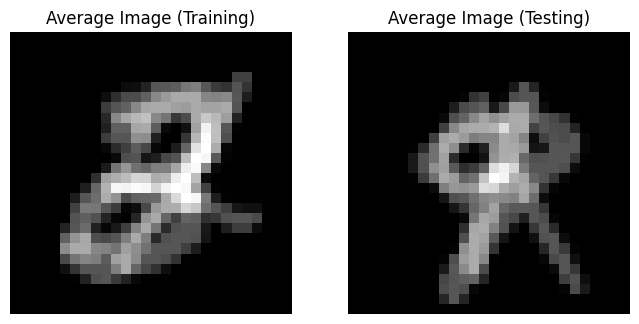

In [14]:

# Categories of interest ('Sandal', 'Sneaker', 'Ankle boot')
categories_of_interest = [5, 7, 9]  # Assuming class indices for these categories

# using the data we filtered earlier
# Filter data for the specified categories
train_data_filtered = X_tr_filtered[categories_of_interest]
test_data_filtered = X_te_filtered[categories_of_interest]

# Calculate the average image for each category
avg_image_train = np.mean(train_data_filtered, axis=0)
avg_image_test = np.mean(test_data_filtered, axis=0)

# Display the average images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(avg_image_train, cmap='gray')
plt.title('Average Image (Training)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_image_test, cmap='gray')
plt.title('Average Image (Testing)')
plt.axis('off')

plt.show()

### S3: Image distances
In the training set, find the shoe image that is most dissimilar from the mean shoe image. Show it as a 2D image
In the training set, find the shoe image that is most similar from the mean shoe image. Show it as a 2D image
Do the same for the testing set
Hint: You can use the "euclidean distance" as your similarity metric. Given that an image i is represented with a flattened feature vector v_i , and the second image j with v_m, the distance between these two images can be calculated using the vector norm of their differences ( | v_i - v_j | )

Q3.1: What is the index of most similar shoe image in the training set: ___

Q3.2: What is the index of most dissimilar shoe image in the training set: ___

Q3.1: What is the index of most dissimilar shoe image in the testing set: ___


In [15]:
## Select images
X = train_data_filtered
Y = test_data_filtered
indAll = np.where(Y == 7)[0]
imgAll = X[indAll, :, :]
print('Num sel: ' + str(indAll.shape))
print('Num img mat: ' + str(imgAll.shape))

Num sel: (2,)
Num img mat: (2, 28, 28)


In [16]:
## Calculate avg img
img_mean = np.mean(imgAll, axis = 0)
img_mean.shape

(28, 28)

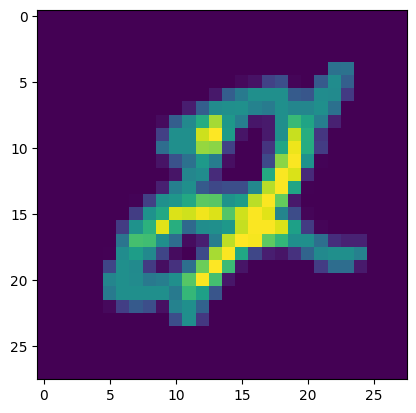

In [ ]:
## Show mean img
plt.imshow(img_mean)
plt.show()

In [17]:
## Find pixelwise "distance" of each image to the mean image
vec_mean = img_mean.flatten()
arr_d = np.zeros(indAll.shape[0])
for i, ind_sel in enumerate(indAll):
  img_sel = X[ind_sel, :, :].flatten()

  d_sel = np.sqrt(np.dot(vec_mean - img_sel, vec_mean - img_sel))
  #d_sel = np.linalg.norm(img_sel - vec_mean)
  #d_sel = np.sqrt(np.square(img_sel - vec_mean).sum())

  arr_d[i]=d_sel

In [18]:
ind_similar = indAll[arr_d.argmin()]
ind_dissimilar = indAll[arr_d.argmax()]

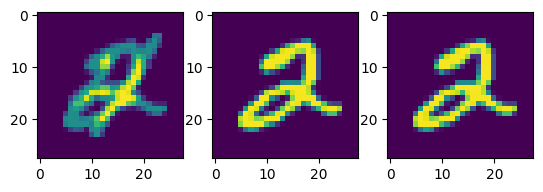

In [19]:
## Show similar / dissimilar images
fig, ax = plt.subplots(nrows = 1, ncols = 3)
ax[0].imshow(img_mean)
ax[1].imshow(X[ind_similar,:,:])
ax[2].imshow(X[ind_dissimilar,:,:])
plt.show()

Num sel: (2,)
Num img mat: (2, 28, 28)


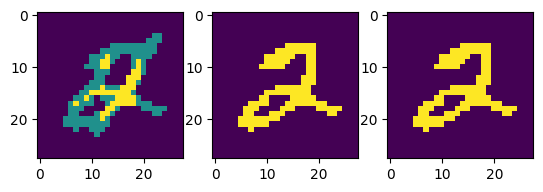

In [20]:
## Select images
X = train_data_filtered
Y = test_data_filtered

## Binarize images
X = (X>128).astype(int)

indAll = np.where(Y == 7)[0]
imgAll = X[indAll, :, :]
print('Num sel: ' + str(indAll.shape))
print('Num img mat: ' + str(imgAll.shape))

## Calculate avg img
img_mean = np.mean(imgAll, axis = 0)
img_mean.shape

## Find pixelwise "distance" of each image to the mean image
vec_mean = img_mean.flatten()
arr_d = np.zeros(indAll.shape[0])
for i, ind_sel in enumerate(indAll):
  img_sel = X[ind_sel, :, :].flatten()

  d_sel = np.sqrt(np.dot(vec_mean - img_sel, vec_mean - img_sel))
  #d_sel = np.linalg.norm(img_sel - vec_mean)
  #d_sel = np.sqrt(np.square(img_sel - vec_mean).sum())

  arr_d[i] = d_sel

ind_similar = indAll[arr_d.argmin()]
ind_dissimilar = indAll[arr_d.argmax()]

## Show similar / dissimilar images
fig, ax = plt.subplots(nrows = 1, ncols = 3)
ax[0].imshow(img_mean)
ax[1].imshow(X[ind_similar,:,:])
ax[2].imshow(X[ind_dissimilar,:,:])
plt.show()

In [21]:
print(ind_similar)
print(ind_dissimilar)

0
0


Num sel: (2,)
Num img mat: (2, 28, 28)


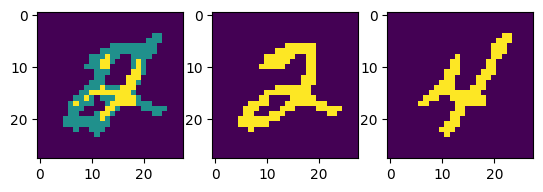

In [22]:
## Select images
X = train_data_filtered
Y = test_data_filtered

## Binarize images
X = (X>128).astype(int)

indAll = np.where(Y == 7)[0]
imgAll = X[indAll, :, :]
print('Num sel: ' + str(indAll.shape))
print('Num img mat: ' + str(imgAll.shape))

## Calculate avg img
img_mean = np.mean(imgAll, axis = 0)
img_mean.shape

## Find pixelwise "distance" of each image to the mean image
vec_mean = img_mean.flatten()
arr_d = np.zeros(indAll.shape[0])
for i, ind_sel in enumerate(indAll):
  img_sel = Y[ind_sel, :, :].flatten()

  d_sel = np.sqrt(np.dot(vec_mean - img_sel, vec_mean - img_sel))
  #d_sel = np.linalg.norm(img_sel - vec_mean)
  #d_sel = np.sqrt(np.square(img_sel - vec_mean).sum())

  arr_d[i] = d_sel

ind_similar = indAll[arr_d.argmin()]
ind_dissimilar = indAll[arr_d.argmax()]

## Show similar / dissimilar images
fig, ax = plt.subplots(nrows = 1, ncols = 3)
ax[0].imshow(img_mean)
ax[1].imshow(X[ind_similar,:,:])
ax[2].imshow(X[ind_dissimilar,:,:])
plt.show()

In [23]:
print(ind_similar)
print(ind_dissimilar)

0
2


### S4: Train a classifier to differentiate shoes from no-shoes
- Create new labels for train and test images as shoes (1) or no-shoes (0)
- Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data
- Display the confusion matrix of each classifier
- Display 4 images that are mis-classified as shoes by each classifier

Q1.1: What is the testing accuracy of each classifier:   ___

Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe:   ___

Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe:   ___


In [24]:
#Create new labels for train and test images as shoes (1) or no-shoes (0)


# shoe categories ('Sandal', 'Sneaker', 'Ankle boot')
# relabeling

X = X_tr_filtered
Y = Y_tr_filtered
X_t = X_te_filtered
Y_t = Y_te_filtered

## Replace labels
X[(Y == 5)] = 1
X[(Y == 7)] = 1
X[(Y == 9)] = 1
X[(Y == 0)] = 0
X[(Y == 1)] = 0
X[(Y == 2)] = 0
X[(Y == 3)] = 0
X[(Y == 4)] = 0
X[(Y == 6)] = 0
X[(Y == 8)] = 0

Y[5] = 1
Y[7] = 1
Y[9] = 1
Y[0] = 0
Y[1] = 0
Y[2] = 0
Y[3] = 0
Y[4] = 0
Y[6] = 0
Y[8] = 0

X_t[(Y_t == 5)] = 1
X_t[(Y_t == 7)] = 1
X_t[(Y_t == 9)] = 1
X_t[(Y_t == 0)] = 0
X_t[(Y_t == 1)] = 0
X_t[(Y_t == 2)] = 0
X_t[(Y_t == 3)] = 0
X_t[(Y_t == 4)] = 0
X_t[(Y_t == 6)] = 0
X_t[(Y_t == 8)] = 0

Y_t[5] = 1
Y_t[7] = 1
Y_t[9] = 1
Y_t[0] = 0
Y_t[1] = 0
Y_t[2] = 0
Y_t[3] = 0
Y_t[4] = 0
Y_t[6] = 0
Y_t[8] = 0

In [25]:
#flatten training images
X = X.reshape(X.shape[0], -1)
Y = Y.reshape(Y.shape[0], -1)
X_t = X_t.reshape(X_t.shape[0], -1)
Y_t = Y_t.reshape(Y_t.shape[0], -1)

In [28]:
#Train 2 different classifiers on the training set (SVM and Random Forest). Apply the classifiers on the testing data

from sklearn import svm

# Create the svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model
clf.fit(X, Y)

# Predict the label
y_pred = clf.predict(X_t)


from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X, Y)

# Predict the labels
rf_y_pred = rf_clf.predict(X_t)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
#Display the confusion matrix of each classifier

from sklearn.metrics import confusion_matrix

result = confusion_matrix(Y_t, y_pred)
print("Confusion Matrix SVM:")
print(result)

rf_result = confusion_matrix(Y_t, rf_y_pred)
print("Confusion Matrix for Random Forest:")
print(rf_result)

Confusion Matrix SVM:
[[104   0   0   0   0   0   0   2   0   0]
 [ 99   0   0   0   0   0   0   2   0   0]
 [ 99   0   0   0   0   0   0   0   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  98   0   0]]
Confusion Matrix for Random Forest:
[[104   0   0   0   0   0   0   2   0   0]
 [ 99   0   0   0   0   0   0   2   0   0]
 [ 99   0   0   0   0   0   0   0   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  98   0   0]]


In [42]:
print(Y_t.shape)
print(y_pred.shape)

print(Y_t[0])
print(y_pred[0])

(1000, 1)
(1000,)
[0]
7


Misclassified images for SVM:
True label: [0] Predicted label: 7


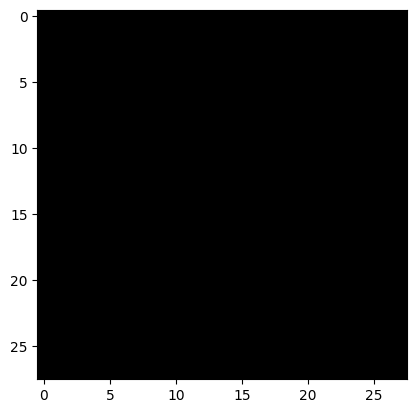

True label: [0] Predicted label: 7


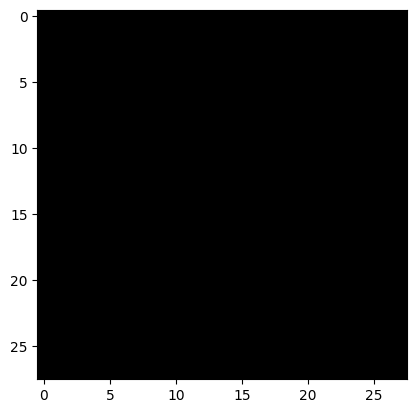

True label: [0] Predicted label: 7


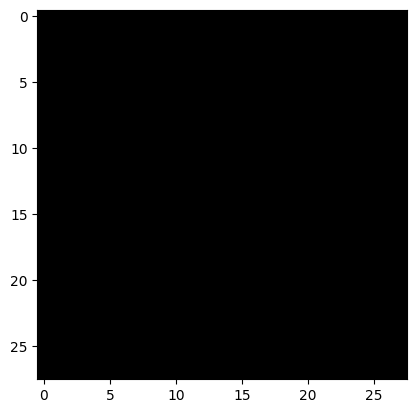

True label: [0] Predicted label: 7


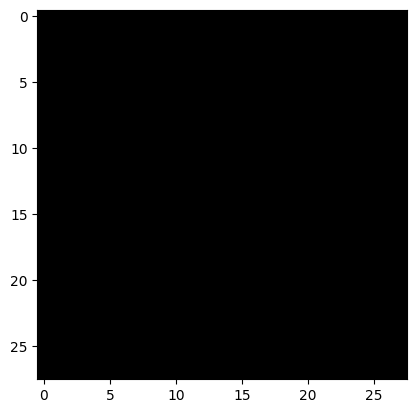


Misclassified images for Random Forest:
True label: [0] Predicted label: 7


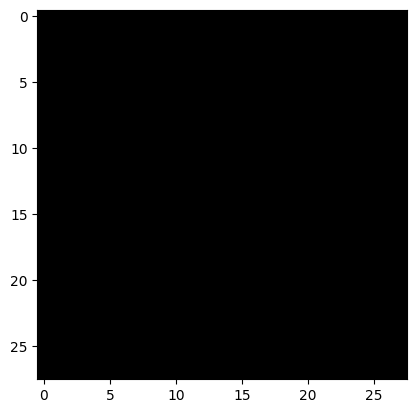

True label: [0] Predicted label: 7


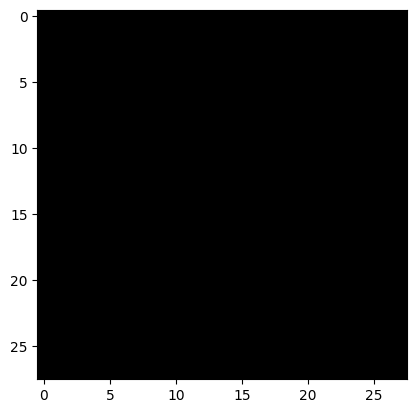

True label: [0] Predicted label: 7


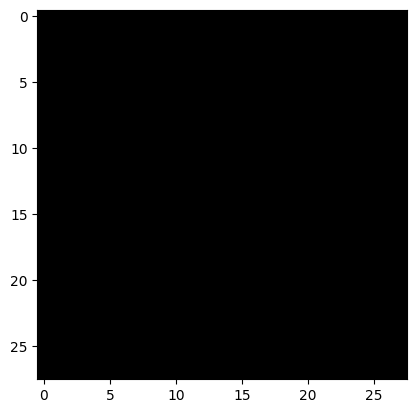

True label: [0] Predicted label: 7


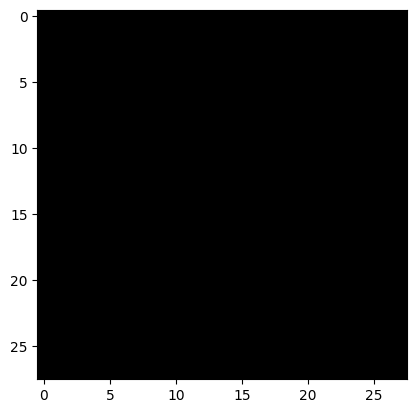

In [47]:
# Display misclassified images for SVM
misclassified_svm_indices = np.where(y_pred != Y_t)[0][:4]  # Get indices of misclassified images
print("Misclassified images for SVM:")
for idx in misclassified_svm_indices:
    print("True label:", Y_t[idx], "Predicted label:", y_pred[idx])
    plt.imshow(X_t[idx].reshape(28, 28), cmap='gray')
    plt.show()

# Display misclassified images for Random Forest
misclassified_rf_indices = np.where(rf_y_pred != Y_t)[0][:4]  # Get indices of misclassified images
print("\nMisclassified images for Random Forest:")
for idx in misclassified_rf_indices:
    print("True label:", Y_t[idx], "Predicted label:", rf_y_pred[idx])
    plt.imshow(X_t[idx].reshape(28, 28), cmap='gray')
    plt.show()


In [45]:
#Q1.1: What is the testing accuracy of each classifier?
from sklearn import metrics

print('Q1.1')
print('Accuracy for SVM: ', metrics.accuracy_score(Y_t, y_pred))

print('Accuracy for Random Forest: ', metrics.accuracy_score(Y_t, rf_y_pred))

Q1.1
Accuracy for SVM:  0.203
Accuracy for Random Forest:  0.203


In [ ]:
#Q1.2: What is the category (original label) that is most frequently mis-classified as a shoe?
# look at the confusion matrix!

print('Category 0 (T-Shirt) is most is most frequently mis-classified as a shoe.')


In [ ]:
#Q1.3: What is the category (original label) that is most frequently mis-classified as a non-shoe?
# looking at the confusion matrix!
print('No categories were mis-classified as non-shoes!')


### Bonus:

- In question S4 you have a chance to discard one of image categories that are part of the non-shoe set. Which category would you prefer to discard? Explain and justify with data
